<a href="https://colab.research.google.com/github/LitvinovaYaI/ML_Credit_cards/blob/main/ML_task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Добавлю необходимые библиотеки



In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from keras.models import Sequential
from keras.layers import InputLayer, Dense, BatchNormalization
from keras.callbacks import ModelCheckpoint
from sklearn import tree
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import  RandomOverSampler
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

Подгружу данные

In [111]:
data = pd.read_csv("/content/creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Необходимо проверить данные на повторы и пустые ячейки

In [112]:
data.info()
data = data.drop_duplicates(keep='first')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Теперь можно приступать к анализу данных.
Цель - научить машину определять является ли банковская операция легальной или фальшивой.
Параметр Сlass (представлен int) равный 1 указывает на мошенническую операцию, равный 0 - на законную.
Все остальные параметры (представлены float), такие как время платежа (Time), его сумма (Amount) и набор безымянных параметров V1-V28.
Необходимо посчитать соотношение легальных и незаконных операций в базе данных и определить какие параметры сильнее других отличаются между собой для дальнейшего обучения.


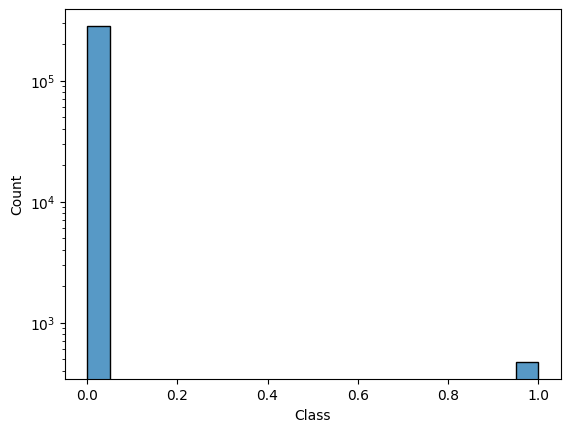

,count,mean,std,min,25%,50%,75%,max
Time,283726.0,94811.077600,47481.047891,0.000000,54204.750000,84692.500000,139298.000000,172792.000000
V1,283726.0,0.005917,1.948026,-56.407510,-0.915951,0.020384,1.316068,2.454930
V2,283726.0,-0.004135,1.646703,-72.715728,-0.600321,0.063949,0.800283,22.057729
V3,283726.0,0.001613,1.508682,-48.325589,-0.889682,0.179963,1.026960,9.382558
V4,283726.0,-0.002966,1.414184,-5.683171,-0.850134,-0.022248,0.739647,16.875344
V5,283726.0,0.001828,1.377008,-113.743307,-0.689830,-0.053468,0.612218,34.801666
V6,283726.0,-0.001139,1.331931,-26.160506,-0.769031,-0.275168,0.396792,73.301626
V7,283726.0,0.001801,1.227664,-43.557242,-0.552509,0.040859,0.570474,120.589494
V8,283726.0,-0.000854,1.179054,-73.216718,-0.208828,0.021898,0.325704,20.007208
V9,283726.0,-0.001596,1.095492,-13.434066,-0.644221,-0.052596,0.595977,15.594995


In [113]:
data['Class'].value_counts()
sns.histplot(data['Class'])
plt.yscale('log')
plt.show()
data.describe().T


Итак, данные плохосбаланасированные. 284315 против 492

Наглядное распределение данных для различных параметров

array([[<Axes: title={'center': 'Time'}>, <Axes: title={'center': 'V1'}>,
        <Axes: title={'center': 'V2'}>, <Axes: title={'center': 'V3'}>,
        <Axes: title={'center': 'V4'}>, <Axes: title={'center': 'V5'}>],
       [<Axes: title={'center': 'V6'}>, <Axes: title={'center': 'V7'}>,
        <Axes: title={'center': 'V8'}>, <Axes: title={'center': 'V9'}>,
        <Axes: title={'center': 'V10'}>, <Axes: title={'center': 'V11'}>],
       [<Axes: title={'center': 'V12'}>, <Axes: title={'center': 'V13'}>,
        <Axes: title={'center': 'V14'}>, <Axes: title={'center': 'V15'}>,
        <Axes: title={'center': 'V16'}>, <Axes: title={'center': 'V17'}>],
       [<Axes: title={'center': 'V18'}>, <Axes: title={'center': 'V19'}>,
        <Axes: title={'center': 'V20'}>, <Axes: title={'center': 'V21'}>,
        <Axes: title={'center': 'V22'}>, <Axes: title={'center': 'V23'}>],
       [<Axes: title={'center': 'V24'}>, <Axes: title={'center': 'V25'}>,
        <Axes: title={'center': 'V26'}>, <

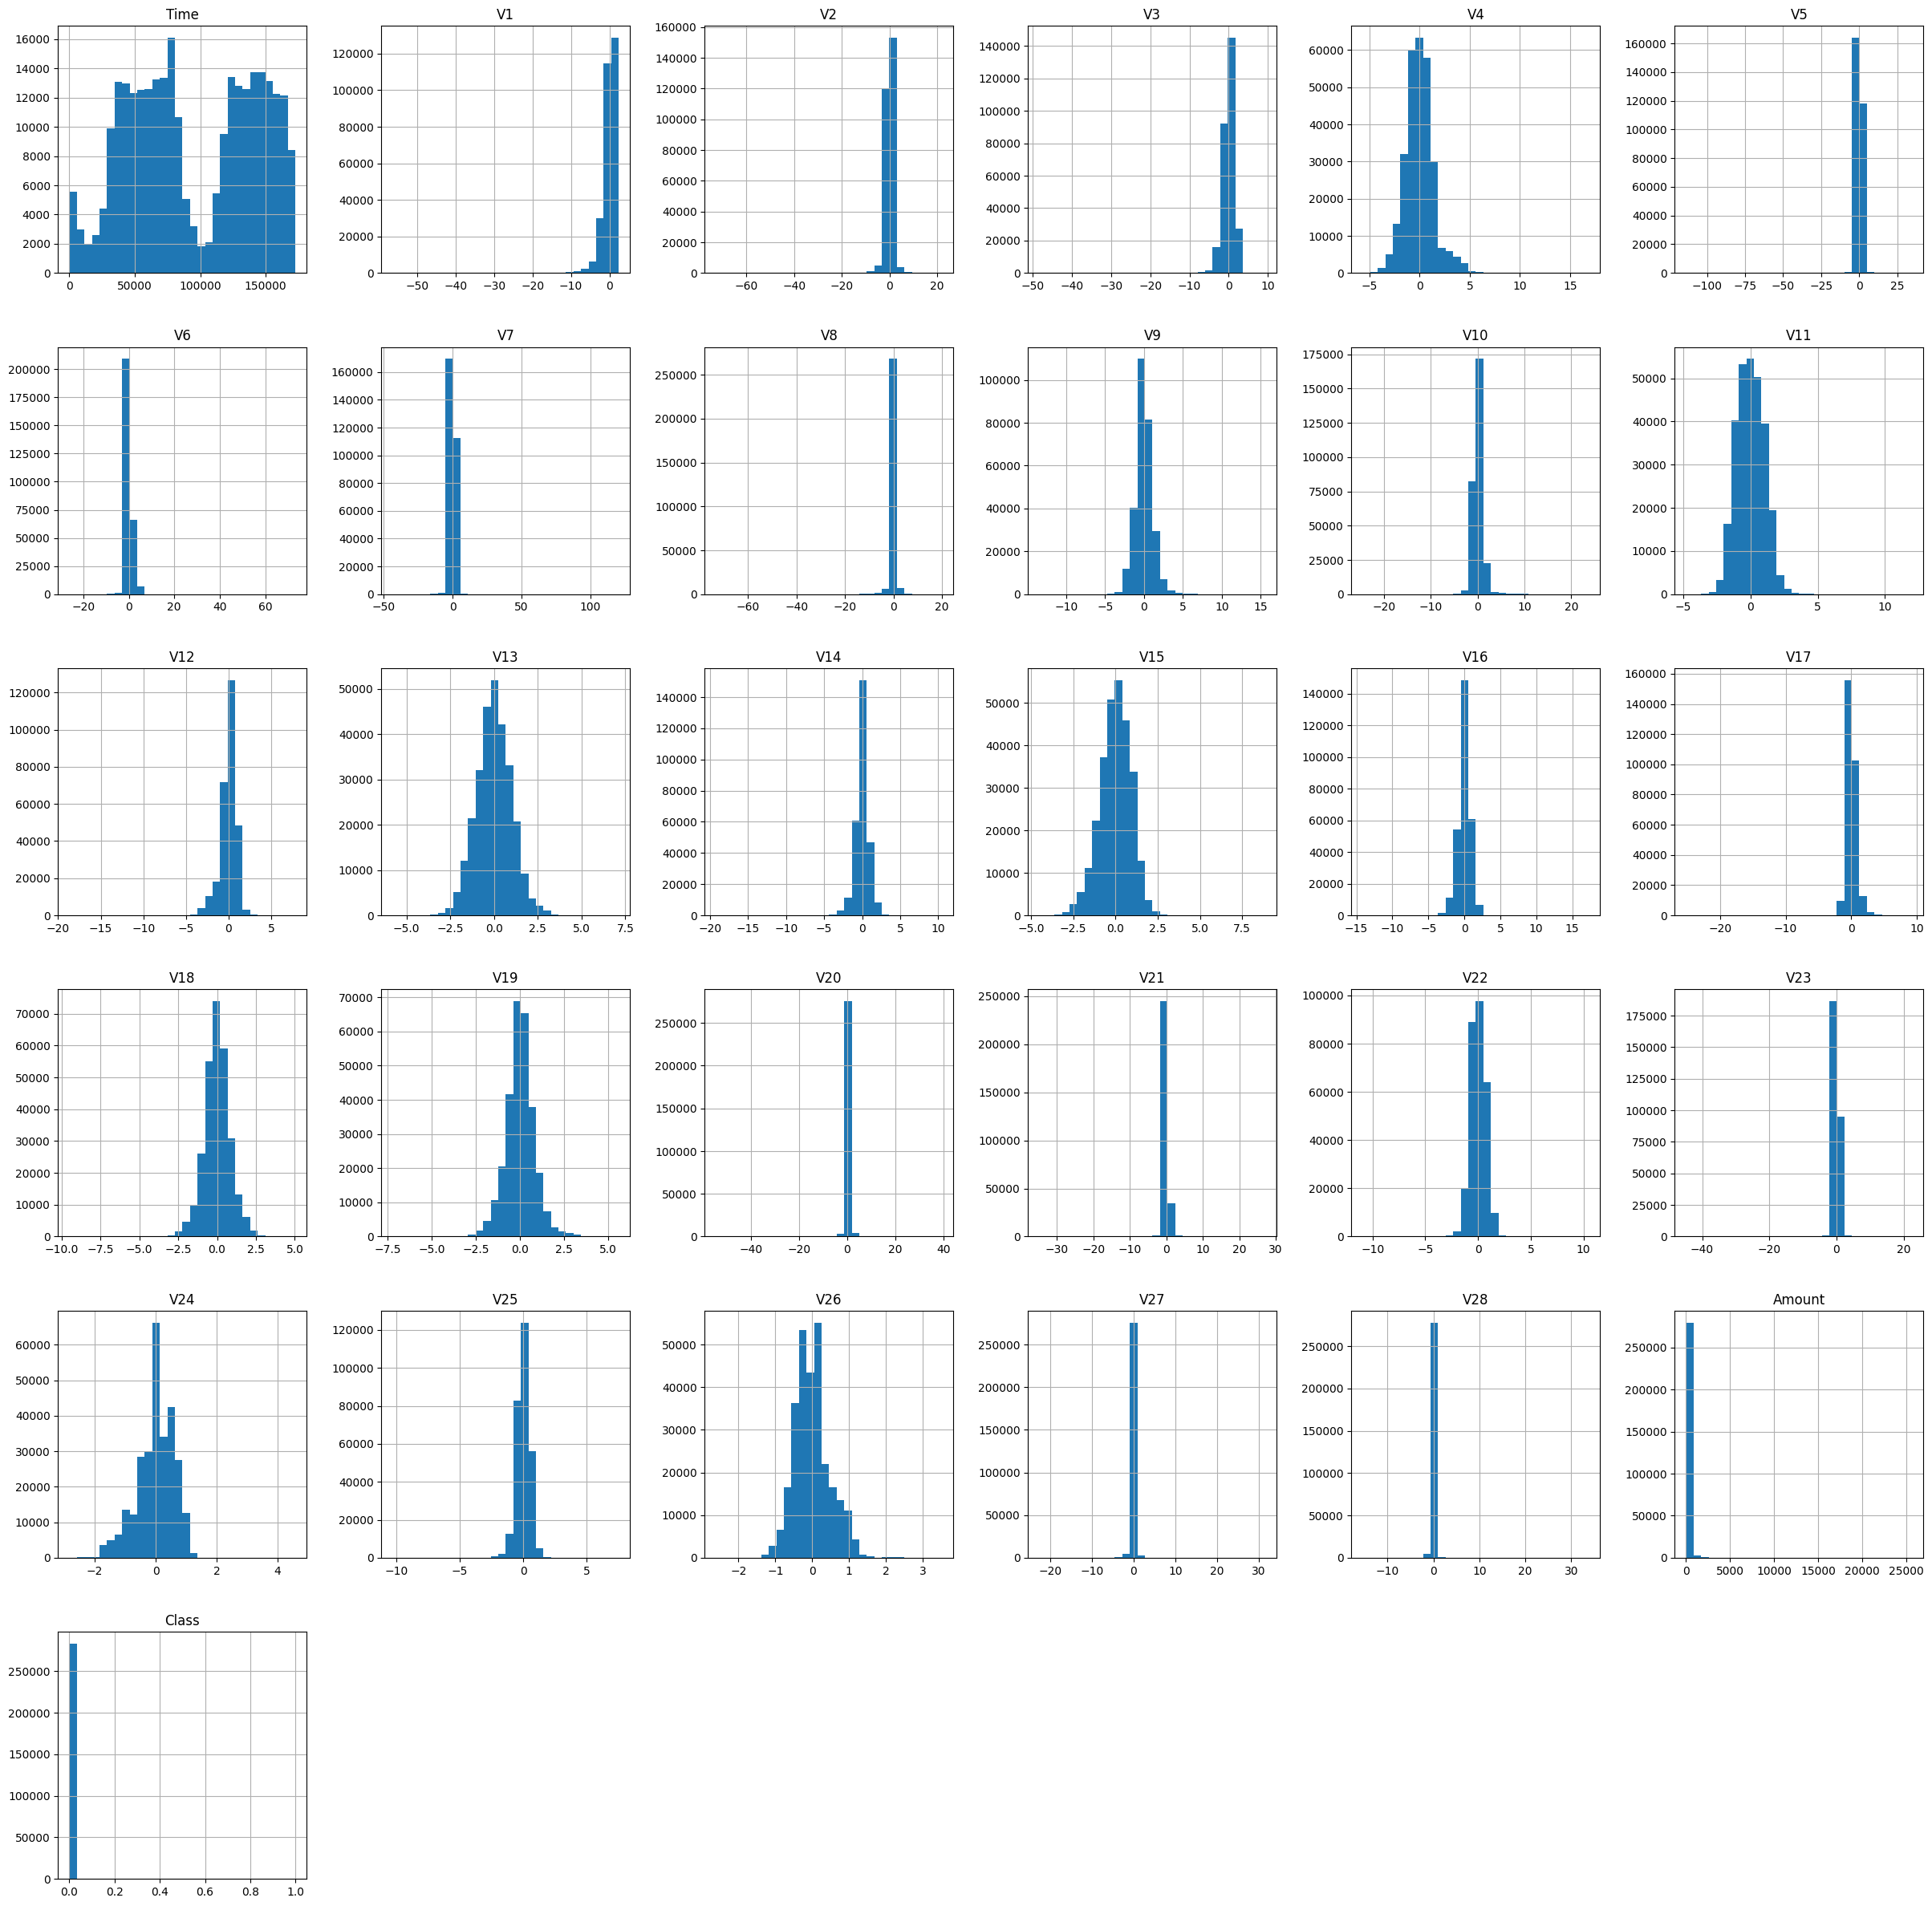

In [114]:
data.hist(bins=30, figsize=(30, 30))

Сильнее всего различаются значения параметров (Time),(Amount),V4,V11,V13,V15,V18,V19,V24,V26

Сбалансирую датасет и посмотрю различаются ли значения параметров в зависимости от значения таргет-величины. Изначальная база данных практически полностью состоит из данных легальных операций (на мошеннические приходится меньше 1%). Создам базу, в которой число легальных операций будет равно числу мошеннических.

In [115]:
impostor = data[data['Class']==1]
legal = data[data['Class']==0]
legal_sampled = data[data['Class']==0].sample(n = impostor.shape[0], random_state=21)
print(f' Impostor Shape{impostor.shape}\n Legal shape{legal_sampled.shape}')
impostor_sampled = impostor
final_data = pd.concat([impostor_sampled, legal_sampled], ignore_index=True)
final_data.shape

 Impostor Shape(473, 31)
 Legal shape(473, 31)


(946, 31)

Теперь можно визуально оценить корреляцию параметров с видом операции

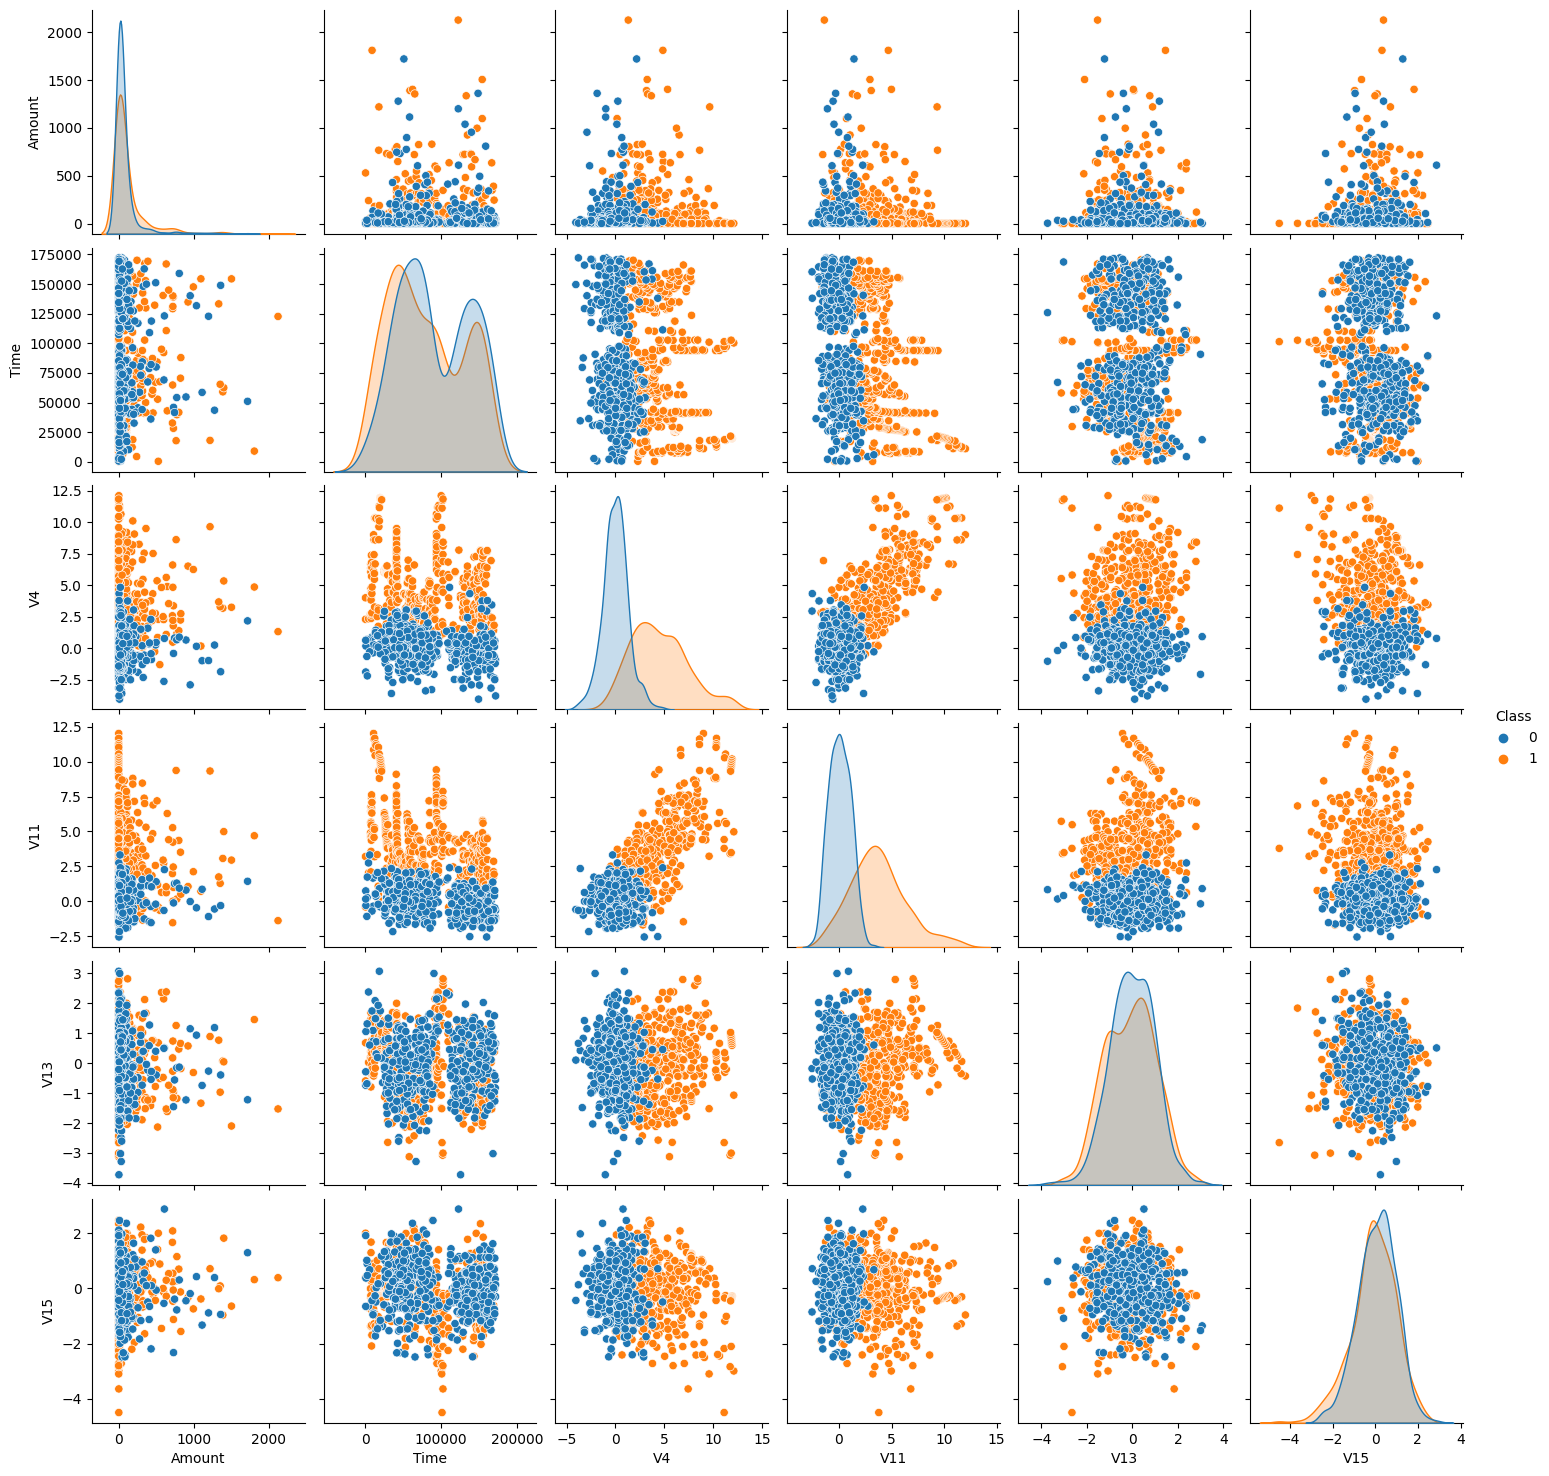

In [116]:
sns.pairplot(final_data[["Amount", "Time", "V4", "V11", "V13", "V15", "Class"]], hue="Class")

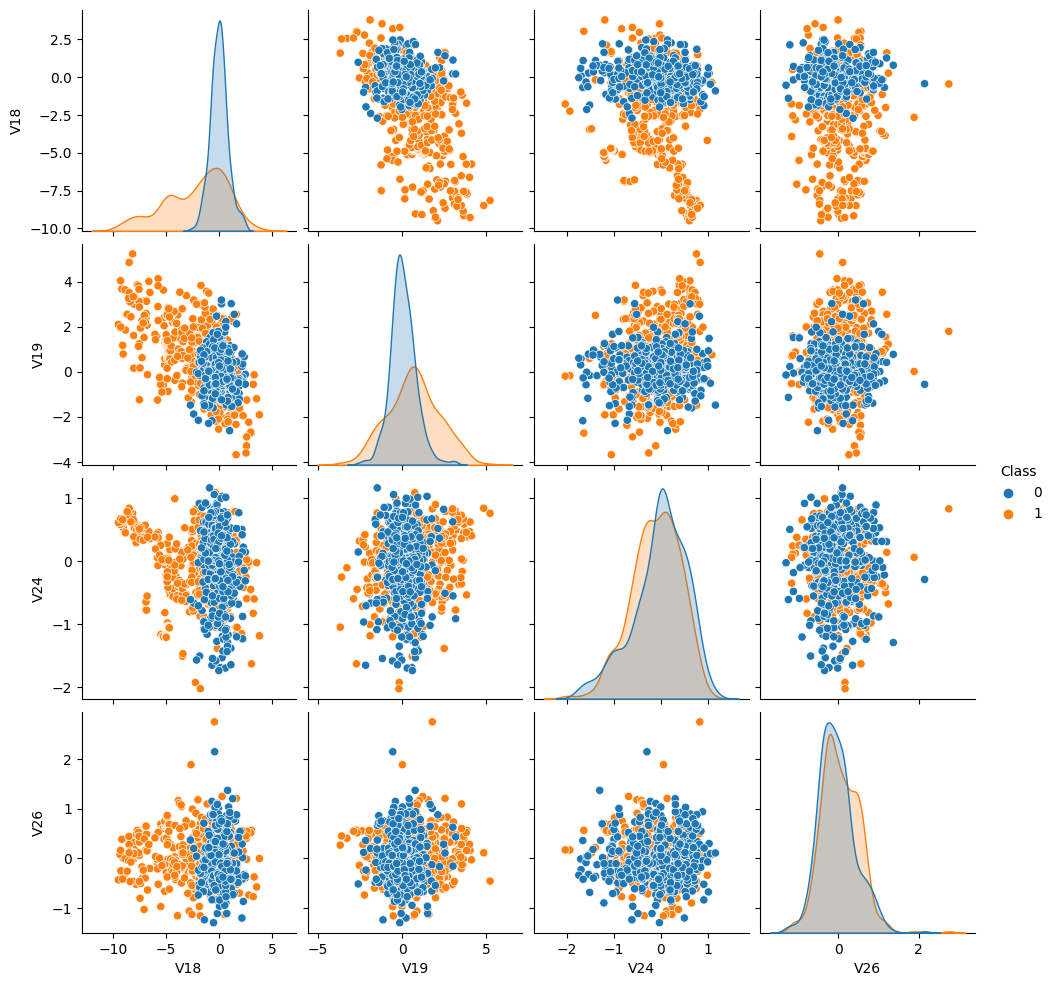

In [117]:
sns.pairplot(final_data[[ "V18", "V19", "V24", "V26", "Class"]], hue="Class")

Можно выделить четыре хорошо коррелирующих признака V12, V14, V18, V19

Также можно расммотреть матрицу корреляции параметров

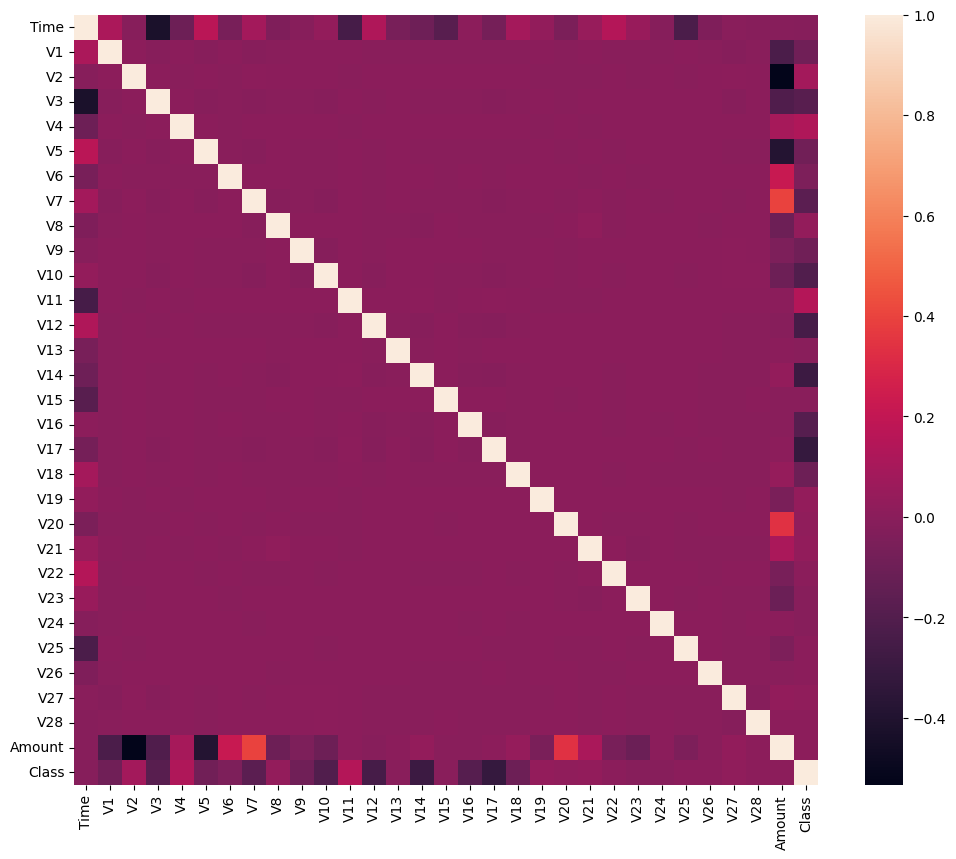

In [118]:
plt.figure(figsize=(12,10))
sns.heatmap(data.corr())
plt.show()

К списку хорошо коррелирующих параметров можно также добавить V17.

Приступим к обучению модели. Отделю таргет-переменную от остальных данных.

In [119]:
x=final_data.drop(columns='Class', axis=1)
y=final_data['Class']

Стандартизирую диапазон функциональных возможностей входного набора данных с помощью функции STANDARD SCALER

In [120]:
scaler=StandardScaler()
x=scaler.fit_transform(x)

Разделю данные на обучающую и тестирующую выборки, используя train_test_split() из библиотеки обработки данных scikit-learn, которая разделит набор данных на подмножества, чтобы свести к минимуму возможность смещения в процессе оценки и проверки.

In [121]:
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.25, random_state=123)
print(f'x_train{x_train.shape}\n, x_test{x_test.shape}\n, y_train{y_train.shape}\n, y_test{y_test.shape}')

x_train(709, 30)
, x_test(237, 30)
, y_train(709,)
, y_test(237,)


Использую различные модели обучения, чтобы по результатам выбрать лучшую. Я буду оценивать модели по результатам метрик precision и recall, которые не зависят, в отличие от accuracy, от соотношения классов и потому применимы в условиях несбалансированных выборок.

In [122]:
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

In [123]:
# Logistic Regression model
def logReg(train_x, train_y, x_test, y_test):
    logistic_model = LogisticRegression()
    logistic_model.fit(train_x, train_y)
    y_pred_train = logistic_model.predict(x_train)
    y_pred_test = logistic_model.predict(x_test)
    res_train = classification_report(y_train, y_pred_train, target_names=["Imposter","Legal"])
    res_test = classification_report(y_test, y_pred_test, target_names=["Imposter","Legal"])
    print(res_train)
    print("*"*100)
    print(res_test)
    plot_confusion_matrix(y_test, y_pred_test, "Logistic Regression model")
    return y_pred_test

In [124]:
# Support vector machine model
def svm(train_x, train_y, x_test, y_test):
    svc = LinearSVC(class_weight='balanced')
    svc.fit(train_x, train_y)
    y_pred_train = svc.predict(x_train)
    y_pred_test = svc.predict(x_test)
    res_train = classification_report(y_train, y_pred_train, target_names=["Imposter","Legal"])
    res_test = classification_report(y_test, y_pred_test, target_names=["Imposter","Legal"])
    print(res_train)
    print("*"*100)
    print(res_test)
    plot_confusion_matrix(y_test, y_pred_test, "Support vector machine model")
    return y_pred_test

In [125]:
#KNeighbors classification model
def KNeighbors(x_train, y_train, x_test, y_test):
  Kneib = KNeighborsClassifier(n_neighbors=3)
  Kneib.fit(x_train, y_train)
  y_pred_train = Kneib.predict(x_train)
  y_pred_test = Kneib.predict(x_test)
  res_train = classification_report(y_train, y_pred_train, target_names=["Imposter","Legal"])
  res_test = classification_report(y_test, y_pred_test, target_names=["Imposter","Legal"])
  print(res_train)
  print("*"*100)
  print(res_test)
  plot_confusion_matrix(y_test, y_pred_test, "KNeighbors classification model")
  return y_pred_test

In [126]:
# Random Forest Classifier model
def RanFor(x_train, y_train, x_test, y_test):
    rf = RandomForestClassifier(max_depth=2, n_jobs=1)
    rf.fit(x_train, y_train)
    y_pred_train = rf.predict(x_train)
    y_pred_test = rf.predict(x_test)
    res_train = classification_report(y_train, y_pred_train, target_names=["Imposter","Legal"])
    res_test = classification_report(y_test, y_pred_test, target_names=["Imposter","Legal"])
    print(res_train)
    print("*"*100)
    print(res_test)
    plot_confusion_matrix(y_test, y_pred_test, "Random Forest Classifier model")
    return y_pred_test

In [127]:
# Sequential model
def neural_net(x_train, y_train, x_test, y_test, it):
    shallow_nn= Sequential()
    shallow_nn.add(InputLayer((x_train.shape[1],)))
    shallow_nn.add(Dense(2, 'relu'))
    shallow_nn.add(BatchNormalization())
    shallow_nn.add(Dense(1,'sigmoid'))

    def neural_net_predictions(model, x):
     return (model.predict(x).flatten() > 0.5).astype(int)

    checkpoint = ModelCheckpoint('shallow_nn', save_best_only = True)
    shallow_nn.compile(optimizer='adam', loss ='binary_crossentropy', metrics=['accuracy'])
    shallow_nn.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=it, callbacks=checkpoint)
    y_pred_train = neural_net_predictions(shallow_nn, x_train)
    y_pred_test = neural_net_predictions(shallow_nn, x_test)

    res_train = classification_report(y_train, y_pred_train, target_names=["Imposter","Legal"])
    res_test = classification_report(y_test, y_pred_test, target_names=["Imposter","Legal"])
    print(res_train)
    print("*"*100)
    print(res_test)
    plot_confusion_matrix(y_test, y_pred_test, "Sequential model")
    return y_pred_test

Функция classification_report выводит 4 стобца данных.
Первый: доля операций, верно определенных классификатором к данному классу.
Второй: доля операций определенных классификатором к данному классу.
Третий: среднее гармоническое от первых двух столбцов.
Четвертый: число операций, отнесенных к данному классу.

              precision    recall  f1-score   support

    Imposter       0.92      0.98      0.95       360
       Legal       0.98      0.91      0.94       349

    accuracy                           0.95       709
   macro avg       0.95      0.95      0.95       709
weighted avg       0.95      0.95      0.95       709

****************************************************************************************************
              precision    recall  f1-score   support

    Imposter       0.89      0.99      0.94       113
       Legal       0.99      0.89      0.94       124

    accuracy                           0.94       237
   macro avg       0.94      0.94      0.94       237
weighted avg       0.94      0.94      0.94       237



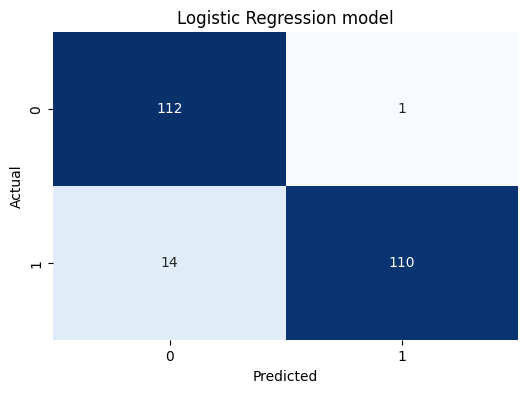

In [128]:
LG = logReg(x_train, y_train, x_test, y_test)

              precision    recall  f1-score   support

    Imposter       0.92      0.98      0.95       360
       Legal       0.98      0.91      0.94       349

    accuracy                           0.95       709
   macro avg       0.95      0.95      0.95       709
weighted avg       0.95      0.95      0.95       709

****************************************************************************************************
              precision    recall  f1-score   support

    Imposter       0.90      0.99      0.94       113
       Legal       0.99      0.90      0.94       124

    accuracy                           0.94       237
   macro avg       0.94      0.94      0.94       237
weighted avg       0.95      0.94      0.94       237



/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


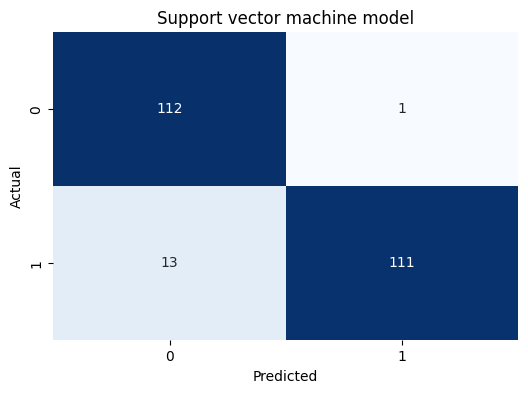

In [129]:
SWM = svm(x_train, y_train, x_test, y_test)

              precision    recall  f1-score   support

    Imposter       0.91      0.98      0.95       360
       Legal       0.98      0.91      0.94       349

    accuracy                           0.94       709
   macro avg       0.95      0.94      0.94       709
weighted avg       0.95      0.94      0.94       709

****************************************************************************************************
              precision    recall  f1-score   support

    Imposter       0.87      0.98      0.92       113
       Legal       0.98      0.87      0.92       124

    accuracy                           0.92       237
   macro avg       0.93      0.93      0.92       237
weighted avg       0.93      0.92      0.92       237



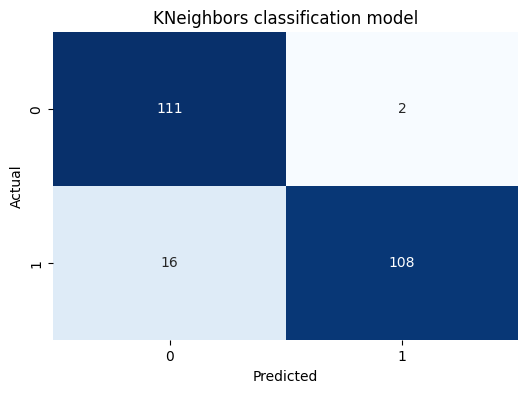

In [130]:
Kneib = KNeighbors(x_train, y_train, x_test, y_test)

              precision    recall  f1-score   support

    Imposter       0.88      1.00      0.93       360
       Legal       1.00      0.86      0.92       349

    accuracy                           0.93       709
   macro avg       0.94      0.93      0.93       709
weighted avg       0.94      0.93      0.93       709

****************************************************************************************************
              precision    recall  f1-score   support

    Imposter       0.84      1.00      0.91       113
       Legal       1.00      0.83      0.91       124

    accuracy                           0.91       237
   macro avg       0.92      0.92      0.91       237
weighted avg       0.93      0.91      0.91       237



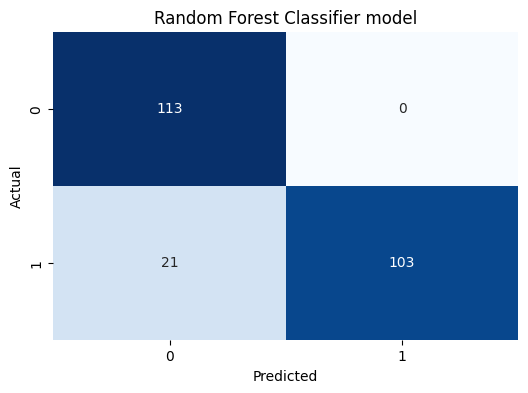

In [131]:
RF = RanFor(x_train, y_train, x_test, y_test)

Epoch 1/5
23/23 [==============================] - 2s 37ms/step - loss: 0.6250 - accuracy: 0.6643 - val_loss: 0.5979 - val_accuracy: 0.6456
Epoch 2/5
23/23 [==============================] - 1s 32ms/step - loss: 0.5761 - accuracy: 0.6982 - val_loss: 0.5645 - val_accuracy: 0.6962
Epoch 3/5
23/23 [==============================] - 1s 32ms/step - loss: 0.5516 - accuracy: 0.7292 - val_loss: 0.5445 - val_accuracy: 0.7215
Epoch 4/5
23/23 [==============================] - 1s 31ms/step - loss: 0.5308 - accuracy: 0.7489 - val_loss: 0.5289 - val_accuracy: 0.7342
Epoch 5/5
8/8 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

    Imposter       0.73      0.91      0.81       360
       Legal       0.88      0.66      0.75       349

    accuracy                           0.79       709
   macro avg       0.81      0.79      0.78       709
weighted avg       0.81      0.79      0.78       709

****************************************************

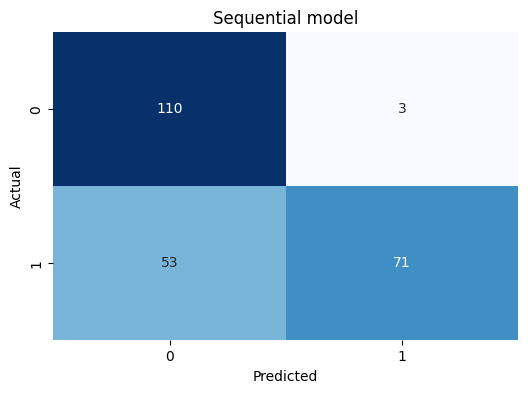

In [132]:
nn = neural_net(x_train, y_train, x_test, y_test, 5)

Также проведу обучение на несбалансированной выборке

In [133]:
no_balance_x = data.drop(columns="Class", axis=1)
no_balance_y = data["Class"]
no_balance_x = scaler.fit_transform(no_balance_x)
no_balance_x, no_balance_x_test, no_balance_y, no_balance_y_test = train_test_split(no_balance_x,no_balance_y, test_size=0.20, random_state=21)

              precision    recall  f1-score   support

    Imposter       0.51      1.00      0.68       360
       Legal       1.00      0.01      0.02       349

    accuracy                           0.51       709
   macro avg       0.76      0.51      0.35       709
weighted avg       0.75      0.51      0.35       709

****************************************************************************************************
              precision    recall  f1-score   support

    Imposter       1.00      1.00      1.00     56654
       Legal       0.89      0.60      0.71        92

    accuracy                           1.00     56746
   macro avg       0.94      0.80      0.86     56746
weighted avg       1.00      1.00      1.00     56746



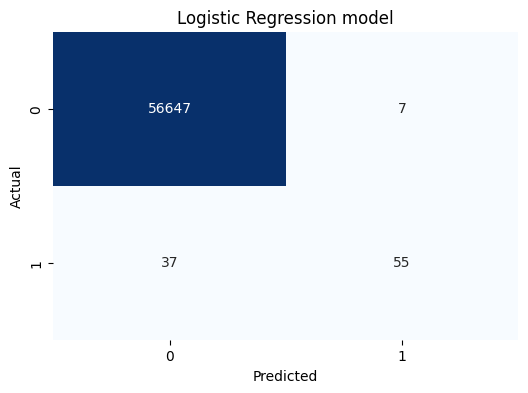

In [134]:
LG_no_balance = logReg(no_balance_x, no_balance_y, no_balance_x_test, no_balance_y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


              precision    recall  f1-score   support

    Imposter       0.51      1.00      0.67       360
       Legal       1.00      0.01      0.01       349

    accuracy                           0.51       709
   macro avg       0.75      0.50      0.34       709
weighted avg       0.75      0.51      0.35       709

****************************************************************************************************
              precision    recall  f1-score   support

    Imposter       1.00      1.00      1.00     56654
       Legal       0.73      0.68      0.71        92

    accuracy                           1.00     56746
   macro avg       0.87      0.84      0.85     56746
weighted avg       1.00      1.00      1.00     56746



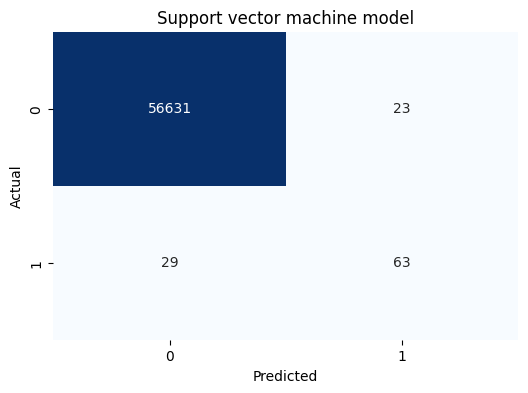

In [135]:
SWM_no_balance = svm(no_balance_x, no_balance_y, no_balance_x_test, no_balance_y_test)

              precision    recall  f1-score   support

    Imposter       1.00      1.00      1.00    226599
       Legal       0.96      0.83      0.89       381

    accuracy                           1.00    226980
   macro avg       0.98      0.91      0.94    226980
weighted avg       1.00      1.00      1.00    226980

****************************************************************************************************
              precision    recall  f1-score   support

    Imposter       1.00      1.00      1.00     56654
       Legal       0.94      0.72      0.81        92

    accuracy                           1.00     56746
   macro avg       0.97      0.86      0.91     56746
weighted avg       1.00      1.00      1.00     56746



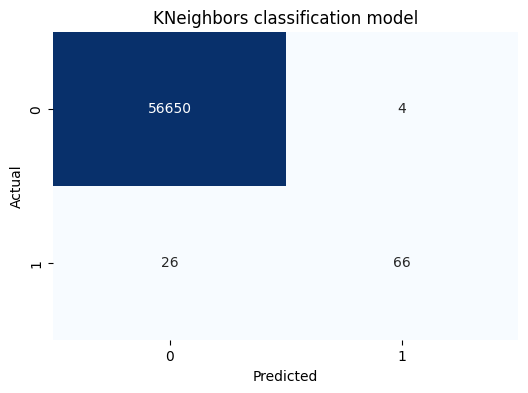

In [136]:
Kneib_no_balance = KNeighbors(no_balance_x, no_balance_y, no_balance_x_test, no_balance_y_test)

              precision    recall  f1-score   support

    Imposter       1.00      1.00      1.00    226599
       Legal       0.86      0.56      0.68       381

    accuracy                           1.00    226980
   macro avg       0.93      0.78      0.84    226980
weighted avg       1.00      1.00      1.00    226980

****************************************************************************************************
              precision    recall  f1-score   support

    Imposter       1.00      1.00      1.00     56654
       Legal       0.87      0.49      0.62        92

    accuracy                           1.00     56746
   macro avg       0.93      0.74      0.81     56746
weighted avg       1.00      1.00      1.00     56746



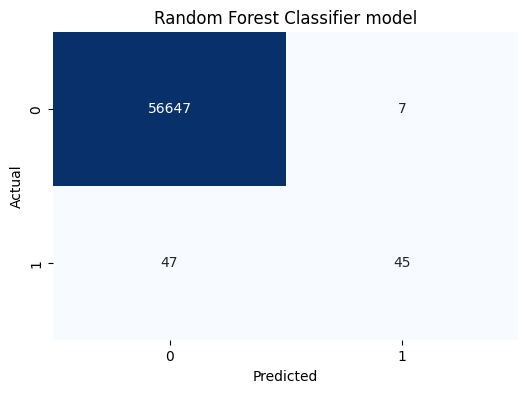

In [137]:
RF_no_balance = RanFor(no_balance_x, no_balance_y, no_balance_x_test, no_balance_y_test)

Epoch 1/5
7094/7094 [==============================] - 19s 3ms/step - loss: 0.0518 - accuracy: 0.9875 - val_loss: 0.0071 - val_accuracy: 0.9993
Epoch 2/5
7094/7094 [==============================] - 15s 2ms/step - loss: 0.0032 - accuracy: 0.9993 - val_loss: 0.0076 - val_accuracy: 0.9993
Epoch 3/5
7094/7094 [==============================] - 16s 2ms/step - loss: 0.0031 - accuracy: 0.9994 - val_loss: 0.0067 - val_accuracy: 0.9993
Epoch 4/5
7094/7094 [==============================] - 15s 2ms/step - loss: 0.0031 - accuracy: 0.9994 - val_loss: 0.0067 - val_accuracy: 0.9993
Epoch 5/5
1774/1774 [==============================] - 3s 2ms/step
              precision    recall  f1-score   support

    Imposter       1.00      1.00      1.00    226599
       Legal       0.85      0.81      0.83       381

    accuracy                           1.00    226980
   macro avg       0.92      0.90      0.91    226980
weighted avg       1.00      1.00      1.00    226980

******************************

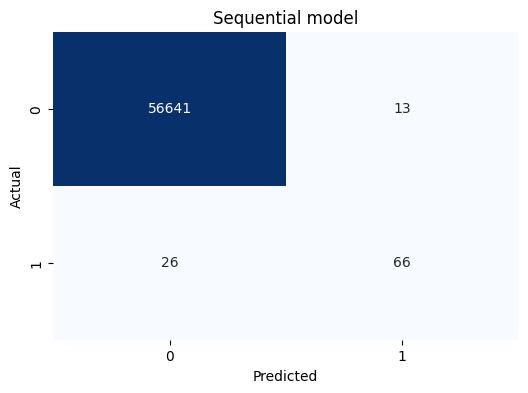

In [138]:
nn_no_balance = neural_net(no_balance_x, no_balance_y, no_balance_x_test, no_balance_y_test, 5)

Итак, результаты для **сбалансированного** датасета: метод линейной регрессии 94%, метод опорных векторов 94%, метод ближайших соседей 93%, метод случайных деревьев 92%, последовательный метод 82% для **несбалансированного** датасета: метод линейной регрессии 94%, метод опорных векторов 86%, метод ближайших соседей 97%, метод случайных деревьев 92%, последовательный метод 90%.

**Лучший результат показал метод KNeighbors classification для несбалансированного датасета.**


Попробую оставить только коррелирующие параметры. Результаты будут в другом файле.


Заспемлпирую данные


In [139]:
ROS = RandomOverSampler(random_state=42)
x_train_smpl, y_train_smpl = ROS.fit_resample(no_balance_x, no_balance_y)
x_test_smpl, y_test_smpl = ROS.fit_resample(no_balance_x_test, no_balance_y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

    Imposter       0.67      1.00      0.80       360
       Legal       1.00      0.48      0.65       349

    accuracy                           0.74       709
   macro avg       0.83      0.74      0.72       709
weighted avg       0.83      0.74      0.73       709

****************************************************************************************************
              precision    recall  f1-score   support

    Imposter       0.86      0.98      0.92     56654
       Legal       0.98      0.85      0.91     56654

    accuracy                           0.91    113308
   macro avg       0.92      0.91      0.91    113308
weighted avg       0.92      0.91      0.91    113308



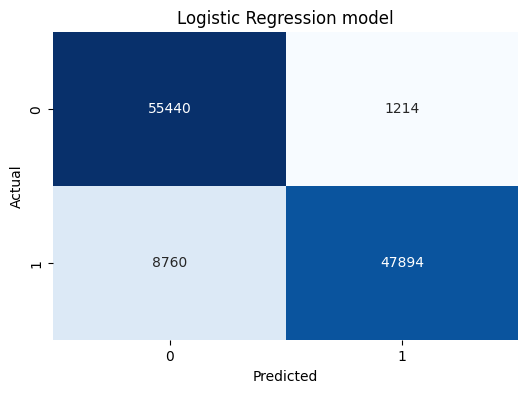

In [140]:
LG_smpl = logReg(x_train_smpl, y_train_smpl, x_test_smpl, y_test_smpl)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


              precision    recall  f1-score   support

    Imposter       0.61      1.00      0.76       360
       Legal       1.00      0.35      0.52       349

    accuracy                           0.68       709
   macro avg       0.81      0.68      0.64       709
weighted avg       0.80      0.68      0.64       709

****************************************************************************************************
              precision    recall  f1-score   support

    Imposter       0.86      0.98      0.92     56654
       Legal       0.98      0.85      0.91     56654

    accuracy                           0.91    113308
   macro avg       0.92      0.91      0.91    113308
weighted avg       0.92      0.91      0.91    113308



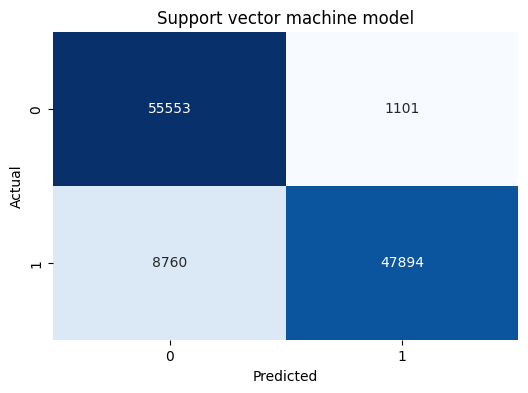

In [141]:
SWM_smpl = svm(x_train_smpl, y_train_smpl, x_test_smpl, y_test_smpl)

              precision    recall  f1-score   support

    Imposter       1.00      1.00      1.00    226599
       Legal       1.00      1.00      1.00    226599

    accuracy                           1.00    453198
   macro avg       1.00      1.00      1.00    453198
weighted avg       1.00      1.00      1.00    453198

****************************************************************************************************
              precision    recall  f1-score   support

    Imposter       0.79      1.00      0.88     56654
       Legal       1.00      0.73      0.84     56654

    accuracy                           0.86    113308
   macro avg       0.89      0.86      0.86    113308
weighted avg       0.89      0.86      0.86    113308



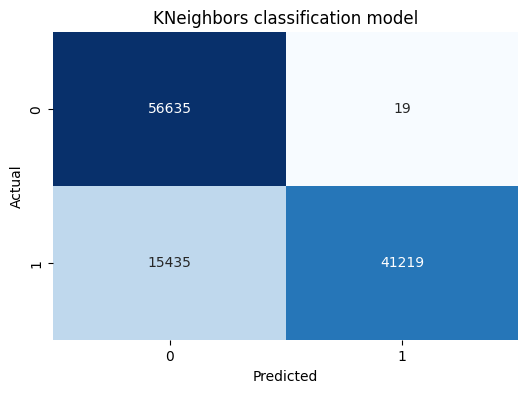

In [142]:
Kneib_smpl = KNeighbors(x_train_smpl, y_train_smpl, x_test_smpl, y_test_smpl)

              precision    recall  f1-score   support

    Imposter       0.89      1.00      0.94    226599
       Legal       1.00      0.88      0.93    226599

    accuracy                           0.94    453198
   macro avg       0.94      0.94      0.94    453198
weighted avg       0.94      0.94      0.94    453198

****************************************************************************************************
              precision    recall  f1-score   support

    Imposter       0.79      1.00      0.88     56654
       Legal       0.99      0.74      0.85     56654

    accuracy                           0.87    113308
   macro avg       0.89      0.87      0.87    113308
weighted avg       0.89      0.87      0.87    113308



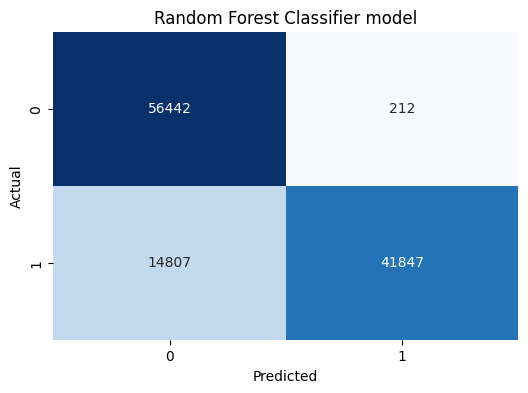

In [143]:
RF_smpl = RanFor(x_train_smpl, y_train_smpl, x_test_smpl, y_test_smpl)

Epoch 1/5
14163/14163 [==============================] - 32s 2ms/step - loss: 0.1642 - accuracy: 0.9347 - val_loss: 0.2971 - val_accuracy: 0.9058
Epoch 2/5
14163/14163 [==============================] - 31s 2ms/step - loss: 0.1227 - accuracy: 0.9545 - val_loss: 0.2955 - val_accuracy: 0.9003
Epoch 3/5
14163/14163 [==============================] - 30s 2ms/step - loss: 0.1214 - accuracy: 0.9553 - val_loss: 0.2988 - val_accuracy: 0.9104
Epoch 4/5
14163/14163 [==============================] - 31s 2ms/step - loss: 0.1203 - accuracy: 0.9555 - val_loss: 0.2967 - val_accuracy: 0.9111
Epoch 5/5
3541/3541 [==============================] - 4s 1ms/step
              precision    recall  f1-score   support

    Imposter       0.94      0.98      0.96    226599
       Legal       0.98      0.94      0.96    226599

    accuracy                           0.96    453198
   macro avg       0.96      0.96      0.96    453198
weighted avg       0.96      0.96      0.96    453198

**********************

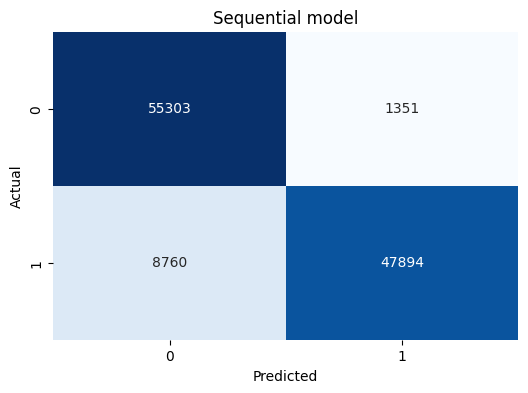

In [144]:
nn_smpl = neural_net(x_train_smpl, y_train_smpl, x_test_smpl, y_test_smpl, 5)

Выведу сводную таблицу

In [151]:
y_pred=[LG, SWM, Kneib, RF, nn, LG_no_balance, SWM_no_balance, Kneib_no_balance, RF_no_balance, nn_no_balance, LG_smpl, SWM_smpl, Kneib_smpl, RF_smpl, nn_smpl]
resualts=pd.DataFrame()
resualts['precision']=[precision_score(y_test,LG),
                       precision_score(y_test,SWM),
                       precision_score(y_test,Kneib),
                       precision_score(y_test,RF),
                       precision_score(y_test,nn),
                       ]
resualts['recall']=[recall_score(y_test,LG),
                    recall_score(y_test,SWM),
                    recall_score(y_test,Kneib),
                    recall_score(y_test,RF),
                    recall_score(y_test,nn),
                    ]
resualts['f1']=[f1_score(y_test,LG),
                f1_score(y_test,SWM),
                f1_score(y_test,Kneib),
                f1_score(y_test,RF),
                f1_score(y_test,nn),
                ]
resualts[' accuracy']=[accuracy_score(y_test,LG),
                       accuracy_score(y_test,SWM),
                       accuracy_score(y_test,Kneib),
                       accuracy_score(y_test,RF),
                       accuracy_score(y_test,nn),
                       ]
resualts.index=['Logistic Regression model', 'Support vector machine model',  'KNeighbors classification model',  'Random Forest Classifier model',  'Sequential model']
resualts

,precision,recall,f1,accuracy
Logistic Regression model,0.990991,0.887097,0.936170,0.936709
Support vector machine model,0.991071,0.895161,0.940678,0.940928
KNeighbors classification model,0.981818,0.870968,0.923077,0.924051
Random Forest Classifier model,1.000000,0.830645,0.907489,0.911392
Sequential model,0.959459,0.572581,0.717172,0.763713


In [150]:
y_pred=[LG, SWM, Kneib, RF, nn, LG_no_balance, SWM_no_balance, Kneib_no_balance, RF_no_balance, nn_no_balance, LG_smpl, SWM_smpl, Kneib_smpl, RF_smpl, nn_smpl]
resualts=pd.DataFrame()
resualts['precision']=[precision_score(no_balance_y_test,LG_no_balance),
                       precision_score(no_balance_y_test,SWM_no_balance),
                       precision_score(no_balance_y_test,Kneib_no_balance),
                       precision_score(no_balance_y_test,RF_no_balance),
                       precision_score(no_balance_y_test,nn_no_balance),
                       precision_score(y_test_smpl,LG_smpl),
                       precision_score(y_test_smpl,SWM_smpl),
                       precision_score(y_test_smpl,Kneib_smpl),
                       precision_score(y_test_smpl,RF_smpl),
                       precision_score(y_test_smpl,nn_smpl)]
resualts['recall']=[recall_score(no_balance_y_test,LG_no_balance),
                    recall_score(no_balance_y_test,SWM_no_balance),
                    recall_score(no_balance_y_test,Kneib_no_balance),
                    recall_score(no_balance_y_test,RF_no_balance),
                    recall_score(no_balance_y_test,nn_no_balance),
                    recall_score(y_test_smpl,LG_smpl),
                    recall_score(y_test_smpl,SWM_smpl),
                    recall_score(y_test_smpl,Kneib_smpl),
                    recall_score(y_test_smpl,RF_smpl),
                    recall_score(y_test_smpl,nn_smpl)]
resualts['f1']=[f1_score(no_balance_y_test,LG_no_balance),
                f1_score(no_balance_y_test,SWM_no_balance),
                f1_score(no_balance_y_test,Kneib_no_balance),
                f1_score(no_balance_y_test,RF_no_balance),
                f1_score(no_balance_y_test,nn_no_balance),
                f1_score(y_test_smpl,LG_smpl),
                f1_score(y_test_smpl,SWM_smpl),
                f1_score(y_test_smpl,Kneib_smpl),
                f1_score(y_test_smpl,RF_smpl),
                f1_score(y_test_smpl,nn_smpl)]
resualts[' accuracy']=[accuracy_score(no_balance_y_test,LG_no_balance),
                       accuracy_score(no_balance_y_test,SWM_no_balance),
                       accuracy_score(no_balance_y_test,Kneib_no_balance),
                       accuracy_score(no_balance_y_test,RF_no_balance),
                       accuracy_score(no_balance_y_test,nn_no_balance),
                       accuracy_score(y_test_smpl,LG_smpl),
                       accuracy_score(y_test_smpl,SWM_smpl),
                       accuracy_score(y_test_smpl,Kneib_smpl),
                       accuracy_score(y_test_smpl,RF_smpl),
                       accuracy_score(y_test_smpl,nn_smpl)]
resualts.index=['Logistic Regression model initial data', 'Support vector machine model initial data',  'KNeighbors classification model initial data',  'Random Forest Classifier model initial data',  'Sequential model initial data', 'Logistic Regression model RandomOverSampler', 'Support vector machine model RandomOverSampler',  'KNeighbors classification model RandomOverSampler',  'Random Forest Classifier model RandomOverSampler',  'Sequential model RandomOverSampler']
resualts

,precision,recall,f1,accuracy
Logistic Regression model initial data,0.887097,0.597826,0.714286,0.999225
Support vector machine model initial data,0.732558,0.684783,0.707865,0.999084
KNeighbors classification model initial data,0.942857,0.717391,0.814815,0.999471
Random Forest Classifier model initial data,0.865385,0.489130,0.625000,0.999048
Sequential model initial data,0.835443,0.717391,0.771930,0.999313
Logistic Regression model RandomOverSampler,0.975279,0.845377,0.905694,0.911974
Support vector machine model RandomOverSampler,0.977528,0.845377,0.906663,0.912972
KNeighbors classification model RandomOverSampler,0.999539,0.727557,0.842132,0.863611
Random Forest Classifier model RandomOverSampler,0.994959,0.738642,0.847852,0.867450
Sequential model RandomOverSampler,0.972566,0.845377,0.904522,0.910765


Сэмплирование данных позволяет повысить значения precision, recall, f1 и понижает величину метрики accuracy. Cводная таблица по результатам использования всех методов, которая позволяет сделать вывод иcходя из полученных метрик, что лучшего результата добилась модель KNeighbors classification на сэмплированных данных.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

    Imposter       0.67      1.00      0.80       360
       Legal       1.00      0.48      0.65       349

    accuracy                           0.74       709
   macro avg       0.83      0.74      0.72       709
weighted avg       0.83      0.74      0.73       709

****************************************************************************************************
              precision    recall  f1-score   support

    Imposter       1.00      0.98      0.99    226599
       Legal       0.07      0.94      0.13       381

    accuracy                           0.98    226980
   macro avg       0.53      0.96      0.56    226980
weighted avg       1.00      0.98      0.99    226980



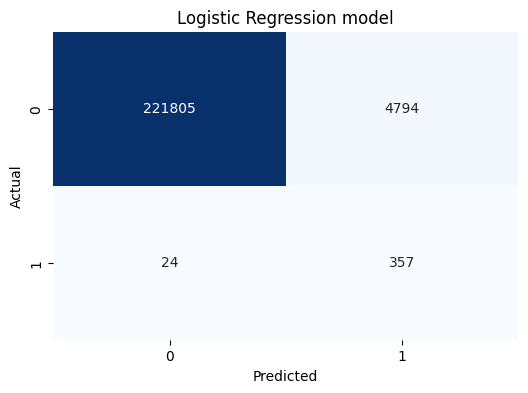

In [156]:
LG_pred = logReg(x_train_smpl, y_train_smpl, no_balance_x, no_balance_y)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


              precision    recall  f1-score   support

    Imposter       0.62      1.00      0.76       360
       Legal       1.00      0.36      0.53       349

    accuracy                           0.68       709
   macro avg       0.81      0.68      0.65       709
weighted avg       0.81      0.68      0.65       709

****************************************************************************************************
              precision    recall  f1-score   support

    Imposter       1.00      0.98      0.99    226599
       Legal       0.08      0.93      0.14       381

    accuracy                           0.98    226980
   macro avg       0.54      0.96      0.57    226980
weighted avg       1.00      0.98      0.99    226980



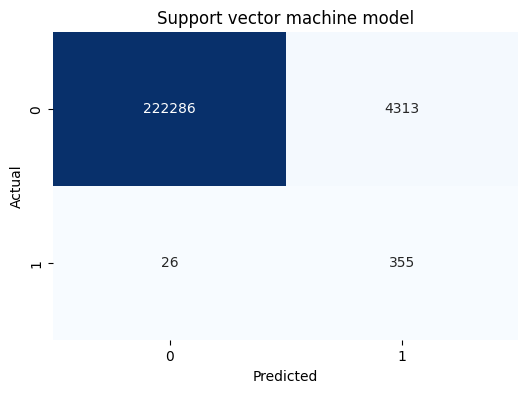

In [157]:
SWM_pred = svm(x_train_smpl, y_train_smpl, no_balance_x, no_balance_y)

              precision    recall  f1-score   support

    Imposter       1.00      1.00      1.00    226599
       Legal       1.00      1.00      1.00    226599

    accuracy                           1.00    453198
   macro avg       1.00      1.00      1.00    453198
weighted avg       1.00      1.00      1.00    453198

****************************************************************************************************
              precision    recall  f1-score   support

    Imposter       1.00      1.00      1.00    226599
       Legal       0.89      1.00      0.94       381

    accuracy                           1.00    226980
   macro avg       0.95      1.00      0.97    226980
weighted avg       1.00      1.00      1.00    226980



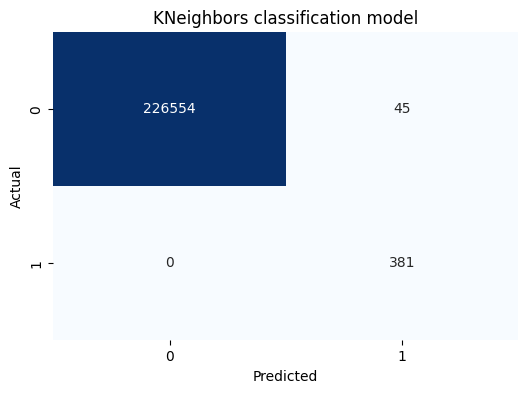

In [158]:
Kneib_pred = KNeighbors(x_train_smpl, y_train_smpl, no_balance_x, no_balance_y)

              precision    recall  f1-score   support

    Imposter       0.90      0.99      0.94    226599
       Legal       0.99      0.89      0.94    226599

    accuracy                           0.94    453198
   macro avg       0.95      0.94      0.94    453198
weighted avg       0.95      0.94      0.94    453198

****************************************************************************************************
              precision    recall  f1-score   support

    Imposter       1.00      0.99      1.00    226599
       Legal       0.22      0.89      0.36       381

    accuracy                           0.99    226980
   macro avg       0.61      0.94      0.68    226980
weighted avg       1.00      0.99      1.00    226980



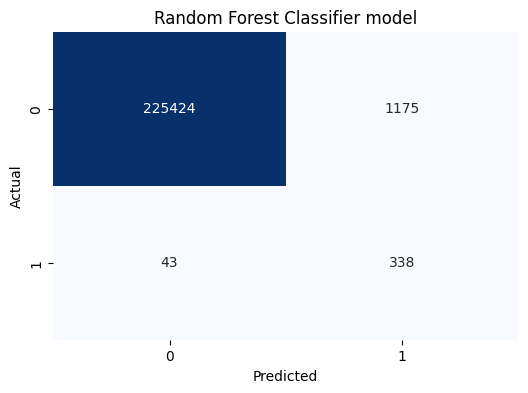

In [159]:
RF_pred = RanFor(x_train_smpl, y_train_smpl, no_balance_x, no_balance_y)

Epoch 1/5
14163/14163 [==============================] - 50s 3ms/step - loss: 0.1870 - accuracy: 0.9266 - val_loss: 0.0777 - val_accuracy: 0.9860
Epoch 2/5
14163/14163 [==============================] - 54s 4ms/step - loss: 0.1430 - accuracy: 0.9470 - val_loss: 0.0705 - val_accuracy: 0.9875
Epoch 3/5
14163/14163 [==============================] - 50s 4ms/step - loss: 0.1410 - accuracy: 0.9480 - val_loss: 0.0721 - val_accuracy: 0.9865
Epoch 4/5
14163/14163 [==============================] - 48s 3ms/step - loss: 0.1406 - accuracy: 0.9480 - val_loss: 0.0767 - val_accuracy: 0.9860
Epoch 5/5
7094/7094 [==============================] - 18s 3ms/step
              precision    recall  f1-score   support

    Imposter       0.93      0.99      0.96    226599
       Legal       0.99      0.93      0.96    226599

    accuracy                           0.96    453198
   macro avg       0.96      0.96      0.96    453198
weighted avg       0.96      0.96      0.96    453198

*********************

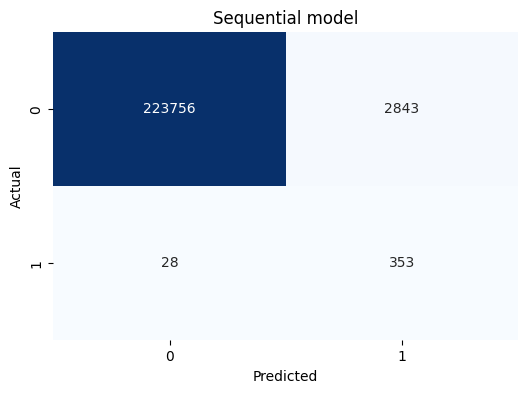

In [155]:
nn_pred = neural_net(x_train_smpl, y_train_smpl, no_balance_x, no_balance_y, 5)

В конце было проведено применение обученных на сэмплированных данных моделей на исходной выборке, котрое показало более точные результаты, так как тестовая выборка содержится в исходной.